In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
marketing = pd.read_csv("marketing_numerical.csv")
(marketing.columns.values)

array(['Sex', ' MaritalStatus', ' Age', ' Education', ' Occupation',
       ' YearsInSf', ' DualIncome', ' HouseholdMembers', ' Under18',
       ' HouseholdStatus', ' TypeOfHome', ' EthnicClass', ' Language',
       'Class'], dtype=object)

In [3]:
marketing

,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatus,TypeOfHome,EthnicClass,Language,Class
0,1,1.0,5,5.0,5.0,5.0,3,5.0,2,1.0,1.0,7.0,1.0,9
1,2,1.0,3,5.0,1.0,5.0,2,3.0,1,2.0,3.0,7.0,1.0,9
2,2,5.0,1,2.0,6.0,5.0,1,4.0,2,3.0,1.0,7.0,1.0,1
3,2,5.0,1,2.0,6.0,3.0,1,4.0,2,3.0,1.0,7.0,1.0,1
4,1,1.0,6,4.0,8.0,5.0,3,2.0,0,1.0,1.0,7.0,1.0,8
5,1,5.0,2,3.0,9.0,4.0,1,3.0,1,2.0,3.0,7.0,1.0,1
6,1,3.0,3,4.0,3.0,5.0,1,1.0,0,2.0,3.0,7.0,1.0,6
7,1,1.0,6,3.0,8.0,5.0,3,3.0,0,2.0,3.0,7.0,1.0,2
8,1,1.0,7,4.0,8.0,4.0,3,2.0,0,2.0,3.0,7.0,1.0,4
9,1,5.0,2,4.0,9.0,5.0,1,1.0,0,2.0,3.0,7.0,1.0,1


In [4]:
i = 100
j = 0
times = 0
features = ['Sex', ' MaritalStatus', ' Age', ' Education', ' Occupation',
       ' YearsInSf', ' DualIncome', ' HouseholdMembers', ' Under18',
       ' HouseholdStatus', ' TypeOfHome', ' EthnicClass', ' Language']
for index, m in marketing.iterrows():
    if index % 40 == 0:
        times += 1
        marketing.at[index+2,features[j]] = i + 1
        j += 3
        i += 10
        if j >= 12:
            j = 0
print times

172


In [5]:
i = 0
j = 0
times = 0
for index, m in marketing.iterrows():
    if index % 40 == 0:
        times += 1
        if index < 6870:
            marketing.at[index+5,:] = marketing.loc[j,:]
        else:
            marketing.at[index+1,:] = marketing.loc[j,:]
        j += 120
        if j >= 6500:
            j = 0
print times

172


In [6]:
marketing.to_csv('/home/valia/Documents/AppliedDataScience/marketingNoise5perCent.csv', sep=',')

In [7]:
data = marketing.iloc[:,0:13]
labels = marketing.iloc[:,13].apply(str)
labels.unique()


array(['9.0', '1.0', '8.0', '6.0', '2.0', '4.0', '7.0', '5.0', '3.0'],
      dtype=object)

In [8]:
kf = KFold(n_splits=2, shuffle=True) #5 times with 2 folds

### Euclidean and k tuning on 5% noise datasets

In [9]:
acc = []
mean_accuracy_model_euclidean = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

mean_accuracy_model1 =  sum(acc)/10    
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model1

              precision    recall  f1-score   support

         5.0       0.61      0.58      0.60       620
         8.0       0.14      0.13      0.14       241
         1.0       0.17      0.18      0.18       241
         4.0       0.14      0.13      0.14       307
         7.0       0.17      0.18      0.18       266
         3.0       0.21      0.19      0.20       452
         6.0       0.20      0.24      0.22       389
         2.0       0.33      0.34      0.33       552
         9.0       0.33      0.32      0.33       370

   micro avg       0.29      0.29      0.29      3438
   macro avg       0.26      0.26      0.26      3438
weighted avg       0.30      0.29      0.29      3438

accuracy:  0.2937754508435137
              precision    recall  f1-score   support

         5.0       0.60      0.61      0.60       624
         8.0       0.18      0.14      0.16       281
         1.0       0.17      0.18      0.18       255
         4.0       0.12      0.14      0.13     

In [10]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

        
mean_accuracy_model2 = sum(acc)/10  
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model2

              precision    recall  f1-score   support

         5.0       0.51      0.71      0.59       642
         8.0       0.13      0.14      0.14       242
         1.0       0.16      0.16      0.16       244
         4.0       0.11      0.11      0.11       276
         7.0       0.13      0.07      0.09       267
         3.0       0.24      0.23      0.23       448
         6.0       0.24      0.17      0.20       420
         2.0       0.31      0.38      0.34       524
         9.0       0.41      0.28      0.33       375

   micro avg       0.31      0.31      0.31      3438
   macro avg       0.25      0.25      0.24      3438
weighted avg       0.29      0.31      0.29      3438

accuracy:  0.30744618964514253
              precision    recall  f1-score   support

         5.0       0.49      0.76      0.59       602
         8.0       0.18      0.16      0.17       280
         1.0       0.12      0.12      0.12       252
         4.0       0.20      0.14      0.17    

In [11]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

        
mean_accuracy_model3 = sum(acc)/10 
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model3

              precision    recall  f1-score   support

         5.0       0.51      0.78      0.62       604
         8.0       0.16      0.12      0.14       261
         1.0       0.19      0.15      0.17       254
         4.0       0.16      0.13      0.14       289
         7.0       0.15      0.11      0.13       250
         3.0       0.23      0.22      0.22       439
         6.0       0.22      0.15      0.18       420
         2.0       0.31      0.42      0.36       526
         9.0       0.45      0.30      0.36       395

   micro avg       0.32      0.32      0.32      3438
   macro avg       0.26      0.27      0.26      3438
weighted avg       0.29      0.32      0.30      3438

accuracy:  0.3219895287958115
              precision    recall  f1-score   support

         5.0       0.53      0.77      0.63       640
         8.0       0.16      0.14      0.15       261
         1.0       0.14      0.11      0.12       242
         4.0       0.19      0.17      0.18     

In [12]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

        
mean_accuracy_model4 = sum(acc)/10  
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model4

              precision    recall  f1-score   support

         5.0       0.51      0.74      0.61       611
         8.0       0.22      0.17      0.19       276
         1.0       0.15      0.12      0.13       253
         4.0       0.15      0.15      0.15       273
         7.0       0.09      0.05      0.06       282
         3.0       0.24      0.20      0.22       447
         6.0       0.19      0.14      0.16       392
         2.0       0.31      0.44      0.37       531
         9.0       0.39      0.31      0.35       373

   micro avg       0.31      0.31      0.31      3438
   macro avg       0.25      0.26      0.25      3438
weighted avg       0.28      0.31      0.29      3438

accuracy:  0.314717859220477
              precision    recall  f1-score   support

         5.0       0.52      0.80      0.63       633
         8.0       0.17      0.15      0.16       246
         1.0       0.16      0.12      0.14       243
         4.0       0.16      0.09      0.11      

In [13]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

        
mean_accuracy_model5 = sum(acc)/10  
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model5

              precision    recall  f1-score   support

         5.0       0.51      0.77      0.61       593
         8.0       0.20      0.12      0.15       259
         1.0       0.18      0.13      0.15       249
         4.0       0.15      0.13      0.14       310
         7.0       0.16      0.10      0.12       273
         3.0       0.21      0.25      0.23       433
         6.0       0.18      0.12      0.14       385
         2.0       0.31      0.41      0.35       546
         9.0       0.45      0.29      0.35       390

   micro avg       0.32      0.32      0.32      3438
   macro avg       0.26      0.26      0.25      3438
weighted avg       0.29      0.32      0.29      3438

accuracy:  0.3150087260034904
              precision    recall  f1-score   support

         5.0       0.53      0.78      0.63       651
         8.0       0.19      0.13      0.16       263
         1.0       0.15      0.11      0.13       247
         4.0       0.14      0.12      0.13     

In [14]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

        
mean_accuracy_model6 = sum(acc)/10
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model6

              precision    recall  f1-score   support

         5.0       0.51      0.78      0.62       618
         8.0       0.15      0.11      0.13       250
         1.0       0.22      0.10      0.14       245
         4.0       0.17      0.15      0.16       288
         7.0       0.11      0.07      0.08       266
         3.0       0.24      0.25      0.25       424
         6.0       0.20      0.11      0.14       406
         2.0       0.30      0.46      0.36       555
         9.0       0.40      0.27      0.32       386

   micro avg       0.32      0.32      0.32      3438
   macro avg       0.25      0.26      0.24      3438
weighted avg       0.29      0.32      0.29      3438

accuracy:  0.3219895287958115
              precision    recall  f1-score   support

         5.0       0.52      0.78      0.62       626
         8.0       0.18      0.11      0.14       272
         1.0       0.24      0.14      0.18       251
         4.0       0.21      0.16      0.18     

In [15]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

        
mean_accuracy_model7 = sum(acc)/10  
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model7

              precision    recall  f1-score   support

         5.0       0.50      0.79      0.61       622
         8.0       0.22      0.08      0.12       270
         1.0       0.20      0.08      0.12       256
         4.0       0.24      0.19      0.21       294
         7.0       0.15      0.06      0.08       260
         3.0       0.21      0.31      0.25       405
         6.0       0.16      0.10      0.12       388
         2.0       0.32      0.46      0.37       569
         9.0       0.47      0.32      0.38       374

   micro avg       0.34      0.34      0.34      3438
   macro avg       0.27      0.27      0.25      3438
weighted avg       0.30      0.34      0.30      3438

accuracy:  0.33507853403141363
              precision    recall  f1-score   support

         5.0       0.49      0.82      0.61       622
         8.0       0.20      0.13      0.15       252
         1.0       0.21      0.08      0.12       240
         4.0       0.19      0.11      0.14    

In [16]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=100, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

        
mean_accuracy_model8 = sum(acc)/10  
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model8

              precision    recall  f1-score   support

         5.0       0.52      0.80      0.63       630
         8.0       0.19      0.11      0.14       255
         1.0       0.27      0.08      0.13       239
         4.0       0.21      0.15      0.17       310
         7.0       0.12      0.00      0.01       265
         3.0       0.19      0.31      0.24       410
         6.0       0.15      0.05      0.07       404
         2.0       0.29      0.50      0.37       548
         9.0       0.40      0.29      0.34       377

   micro avg       0.33      0.33      0.33      3438
   macro avg       0.26      0.26      0.23      3438
weighted avg       0.29      0.33      0.28      3438

accuracy:  0.32926119837114604
              precision    recall  f1-score   support

         5.0       0.48      0.84      0.61       614
         8.0       0.08      0.01      0.02       267
         1.0       0.20      0.07      0.10       257
         4.0       0.20      0.14      0.16    

In [17]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=150, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

        
mean_accuracy_model9 = sum(acc)/10  
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model9

              precision    recall  f1-score   support

         5.0       0.49      0.82      0.62       623
         8.0       0.16      0.02      0.03       272
         1.0       0.12      0.03      0.05       252
         4.0       0.21      0.19      0.20       300
         7.0       0.00      0.00      0.00       265
         3.0       0.21      0.19      0.20       443
         6.0       0.18      0.13      0.15       364
         2.0       0.27      0.54      0.36       539
         9.0       0.41      0.29      0.34       380

   micro avg       0.32      0.32      0.32      3438
   macro avg       0.23      0.25      0.22      3438
weighted avg       0.26      0.32      0.27      3438

accuracy:  0.32431646305991857
              precision    recall  f1-score   support

         5.0       0.50      0.83      0.63       621
         8.0       0.09      0.02      0.04       250
         1.0       0.26      0.05      0.08       244
         4.0       0.20      0.14      0.16    

[0.29909831297265854, 0.3085805700988947, 0.3194299011052938, 0.32309482257126243, 0.3238510762070972, 0.32515997673065733, 0.3320826061663758, 0.3307737056428156, 0.3258580570098895]


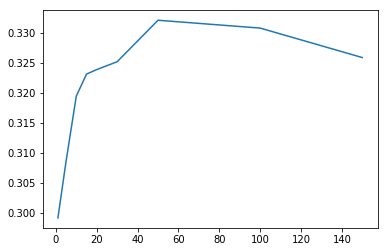

In [18]:
print mean_accuracy_model_euclidean
k = [1, 5, 10, 15, 20, 30, 50, 100, 150]
fig = plt.figure()
ax = plt.axes()
ax.plot(k, mean_accuracy_model_euclidean)
plt.show()

### Minkowski and k tuning on 5% noise dataset

In [19]:
acc = []
mean_accuracy_model_minkowski = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model10 = sum(acc)/10  
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model10

set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.61      0.61      0.61       621
         8.0       0.16      0.12      0.14       265
         1.0       0.16      0.20      0.17       235
         4.0       0.14      0.13      0.13       309
         7.0       0.13      0.14      0.13       266
         3.0       0.22      0.21      0.22       410
         6.0       0.24      0.19      0.21       416
         2.0       0.30      0.33      0.31       545
         9.0       0.28      0.32      0.30       371

   micro avg       0.29      0.29      0.29      3438
   macro avg       0.25      0.25      0.25      3438
weighted avg       0.29      0.29      0.29      3438

accuracy:  0.28970331588132636
set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.58      0.59      0.59       623
         8.0     

In [20]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model11 = sum(acc)/10  
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model11

set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.51      0.74      0.60       611
         8.0       0.18      0.16      0.17       277
         1.0       0.17      0.17      0.17       243
         4.0       0.14      0.13      0.14       290
         7.0       0.14      0.09      0.11       266
         3.0       0.25      0.24      0.24       432
         6.0       0.22      0.16      0.19       405
         2.0       0.32      0.36      0.34       540
         9.0       0.40      0.30      0.34       374

   micro avg       0.31      0.31      0.31      3438
   macro avg       0.26      0.26      0.26      3438
weighted avg       0.29      0.31      0.30      3438

accuracy:  0.3126817917393834
set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.51      0.74      0.61       633
         8.0      

In [21]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model12 = sum(acc)/10 
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model12

set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.50      0.77      0.60       615
         8.0       0.25      0.21      0.23       263
         1.0       0.13      0.10      0.11       247
         4.0       0.16      0.13      0.14       319
         7.0       0.13      0.10      0.11       256
         3.0       0.21      0.21      0.21       441
         6.0       0.23      0.13      0.17       405
         2.0       0.32      0.43      0.37       515
         9.0       0.45      0.29      0.35       377

   micro avg       0.32      0.32      0.32      3438
   macro avg       0.26      0.26      0.26      3438
weighted avg       0.29      0.32      0.30      3438

accuracy:  0.32024432809773123
set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.54      0.76      0.63       629
         8.0     

In [22]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model11 = sum(acc)/10  
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model11

set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.53      0.76      0.62       622
         8.0       0.17      0.14      0.15       251
         1.0       0.15      0.11      0.13       225
         4.0       0.12      0.10      0.11       285
         7.0       0.11      0.07      0.09       273
         3.0       0.21      0.22      0.21       444
         6.0       0.28      0.14      0.18       417
         2.0       0.28      0.39      0.32       548
         9.0       0.38      0.34      0.36       373

   micro avg       0.31      0.31      0.31      3438
   macro avg       0.25      0.25      0.24      3438
weighted avg       0.28      0.31      0.29      3438

accuracy:  0.31151832460732987
set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.51      0.78      0.61       622
         8.0     

In [23]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model13 = sum(acc)/10  
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model13

set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.53      0.77      0.63       624
         8.0       0.17      0.14      0.16       269
         1.0       0.18      0.13      0.15       238
         4.0       0.15      0.11      0.13       297
         7.0       0.23      0.10      0.14       260
         3.0       0.25      0.25      0.25       440
         6.0       0.20      0.13      0.16       405
         2.0       0.30      0.46      0.37       539
         9.0       0.42      0.31      0.36       366

   micro avg       0.33      0.33      0.33      3438
   macro avg       0.27      0.27      0.26      3438
weighted avg       0.30      0.33      0.30      3438

accuracy:  0.32926119837114604
set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.50      0.77      0.60       620
         8.0     

In [24]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model14 = sum(acc)/10  
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model14

set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.49      0.80      0.61       620
         8.0       0.16      0.06      0.09       271
         1.0       0.21      0.11      0.14       256
         4.0       0.19      0.11      0.14       302
         7.0       0.12      0.07      0.09       246
         3.0       0.21      0.27      0.23       429
         6.0       0.21      0.10      0.13       424
         2.0       0.31      0.49      0.38       536
         9.0       0.39      0.31      0.35       354

   micro avg       0.33      0.33      0.33      3438
   macro avg       0.26      0.26      0.24      3438
weighted avg       0.28      0.33      0.29      3438

accuracy:  0.3251890634089587
set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.52      0.76      0.62       624
         8.0      

In [25]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model15 = sum(acc)/10 
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model15

set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.53      0.83      0.65       635
         8.0       0.15      0.11      0.13       242
         1.0       0.24      0.15      0.19       245
         4.0       0.23      0.13      0.17       306
         7.0       0.16      0.05      0.07       272
         3.0       0.22      0.26      0.24       441
         6.0       0.21      0.13      0.16       386
         2.0       0.30      0.43      0.35       550
         9.0       0.33      0.28      0.30       361

   micro avg       0.33      0.33      0.33      3438
   macro avg       0.26      0.26      0.25      3438
weighted avg       0.29      0.33      0.30      3438

accuracy:  0.33420593368237345
set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.48      0.77      0.60       609
         8.0     

In [26]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=100, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model16 = sum(acc)/10  
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model16

set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.51      0.82      0.63       634
         8.0       0.23      0.08      0.12       266
         1.0       0.28      0.08      0.12       239
         4.0       0.19      0.13      0.15       311
         7.0       0.11      0.06      0.08       240
         3.0       0.19      0.16      0.17       460
         6.0       0.19      0.08      0.11       375
         2.0       0.27      0.54      0.36       551
         9.0       0.42      0.34      0.37       362

   micro avg       0.33      0.33      0.33      3438
   macro avg       0.27      0.25      0.23      3438
weighted avg       0.29      0.33      0.28      3438

accuracy:  0.32926119837114604
set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.48      0.84      0.61       610
         8.0     

In [27]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=150, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model17 = sum(acc)/10
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model17

set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.50      0.84      0.63       640
         8.0       0.18      0.03      0.05       272
         1.0       0.22      0.05      0.09       237
         4.0       0.20      0.16      0.18       299
         7.0       0.14      0.04      0.06       253
         3.0       0.20      0.21      0.20       435
         6.0       0.17      0.07      0.10       397
         2.0       0.26      0.46      0.34       553
         9.0       0.33      0.33      0.33       352

   micro avg       0.32      0.32      0.32      3438
   macro avg       0.24      0.24      0.22      3438
weighted avg       0.27      0.32      0.27      3438

accuracy:  0.3219895287958115
set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
              precision    recall  f1-score   support

         5.0       0.49      0.83      0.62       604
         8.0      

[0.29816753926701567, 0.31000581733566024, 0.31902268760907504, 0.3187027341477603, 0.32239674229203025, 0.3264688772542176, 0.32821407795229784, 0.3282722513089006, 0.3264979639325189]


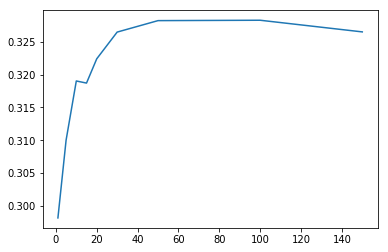

In [28]:
print mean_accuracy_model_minkowski
k = [1, 5, 10, 15, 20, 30, 50, 100, 150]
fig = plt.figure()
ax = plt.axes()
ax.plot(k, mean_accuracy_model_minkowski)
plt.show()

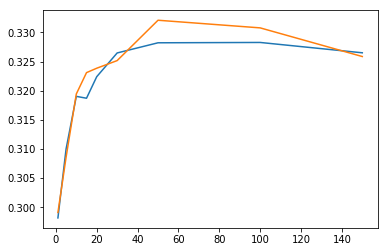

In [29]:
fig = plt.figure()
ax = plt.axes()
ax.plot(k, mean_accuracy_model_minkowski)
ax.plot(k, mean_accuracy_model_euclidean)
plt.show()